# Regression Week 3: Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

# Fire up Turi Create

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Polynomial_sframe function

Using the hints above complete the following function to create an SFrame consisting of the powers of an SArray up to a specific degree:

In [32]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature**power
    return poly_dataframe

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [33]:
test_series = pd.Series([1., 2., 3.])
ploy_data = polynomial_dataframe(test_series, 3)
ploy_data

,power_1,power_2,power_3
0,1.0,1.0,1.0
1,2.0,4.0,8.0
2,3.0,9.0,27.0


# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [10]:
sales = pd.read_csv('kc_house_data.csv')
sales_train = pd.read_csv('wk3_kc_house_train_data.csv')
sales_test = pd.read_csv('wk3_kc_house_test_data.csv')
sales_valid = pd.read_csv('wk3_kc_house_valid_data.csv')

As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [34]:
X_sales = polynomial_dataframe(sales['sqft_living'], 1)
y_sales = sales['price']

NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent across users.

In [35]:
SLR1 = LinearRegression()
SLR1.fit(X_sales, y_sales)

LinearRegression()

In [15]:
#let's take a look at the weights before we plot
print(SLR1.coef_[0])
print(SLR1.intercept_)

280.62356789744825
-43580.74309447396


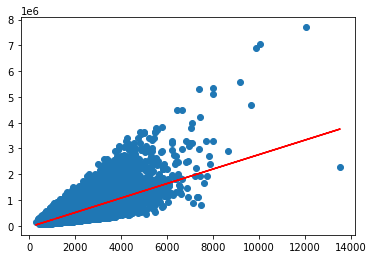

In [36]:
plt.scatter(X_sales, y_sales)
plt.plot(X_sales, SLR1.predict(X_sales), color = 'r')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


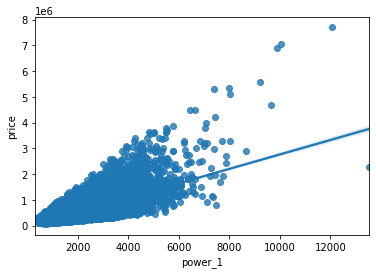

In [46]:
sns.regplot(X_sales, y_sales, order = 1)
plt.show()

Let's unpack that plt.plot() command. The first pair of SArrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [37]:
sales_X_2 = polynomial_dataframe(sales['sqft_living'], 2)
sales_X_2.head()

,power_1,power_2
0,1180,1392400
1,2570,6604900
2,770,592900
3,1960,3841600
4,1680,2822400


In [38]:
SLR2 = LinearRegression()
SLR2.fit(sales_X_2, y_sales)

LinearRegression()

In [23]:
print(SLR2.coef_[0])
print(SLR2.intercept_)

67.99409468579405
199222.2793054846


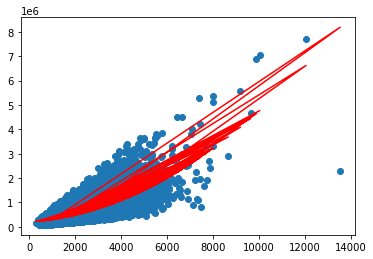

In [39]:
plt.scatter(sales_X_2['power_1'], y_sales)
plt.plot(sales_X_2['power_1'], SLR2.predict(sales_X_2), 'r-')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


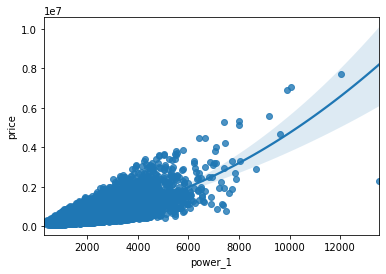

In [47]:
sns.regplot(X_sales, y_sales, order = 2)
plt.show()

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

In [40]:
sales_X_3 = polynomial_dataframe(sales['sqft_living'], 3)
sales_X_3.head()

,power_1,power_2,power_3
0,1180,1392400,1643032000
1,2570,6604900,16974593000
2,770,592900,456533000
3,1960,3841600,7529536000
4,1680,2822400,4741632000


In [41]:
SLR3 = LinearRegression()
SLR3.fit(sales_X_3, y_sales)

LinearRegression()

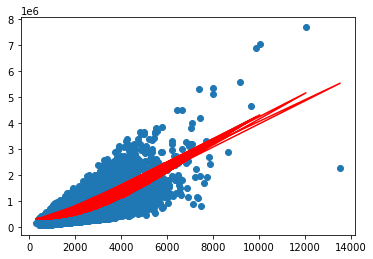

In [42]:
plt.scatter(sales_X_3['power_1'], y_sales)
plt.plot(sales_X_3['power_1'], SLR3.predict(sales_X_3), 'r-')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


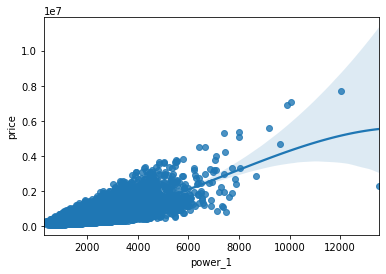

In [48]:
sns.regplot(X_sales, y_sales, order = 3)
plt.show()

Now try a 15th degree polynomial:

In [43]:
sales_X_15 = polynomial_dataframe(sales['sqft_living'], 15)
sales_X_15.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
0,1180,1392400,1643032000,1938777760000,2287757756800000,2699554153024000000,-5812824183432429568,3056258969686310912,-9176254217225240576,258794941722918912,-8216618020018061312,7378119149911801856,-682605894982172672,6181783164256518144,8040224707418521600
1,2570,6604900,16974593000,43624704010000,112115489305700000,-7011097663703825856,3947964295399478912,558998636407415040,-2219542182288373248,-4179489704867798016,-5283490611281860608,-1767232744151773184,-3889110337507385344,3121720556596641792,-1511841610285547520
2,770,592900,456533000,351530410000,270678415700000,208422380089000000,-5535463994855964544,-1109395012186275584,-5683931992792825344,-4749288981311781888,-4497189015580833792,5152343860153683968,1254796470783057920,6962590670057914368,-6807709504885456896
3,1960,3841600,7529536000,14757890560000,28925465497600000,1353680154167345152,-3118044446178934784,-5494826112850591744,3039357859218325504,-1156931740267184128,1363310142593957888,-2690011203727523840,3346845774985035776,-7223171269930254336,-8762984528072409088
4,1680,2822400,4741632000,7965941760000,13382782156800000,4036329949714448384,-7367503604841709568,359217325037060096,-5257448370154242048,3477149447748583424,-6006799148307709952,-1053560837827985408,905223525101469696,8142508126285856768,-8070450532247928832


In [44]:
SLR15 = LinearRegression()
SLR15.fit(sales_X_15, y_sales)

LinearRegression()

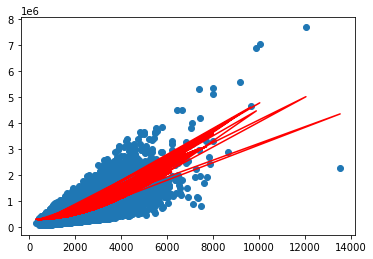

In [45]:
plt.scatter(sales_X_15['power_1'], y_sales)
plt.plot(sales_X_15['power_1'], SLR15.predict(sales_X_15), 'r-')
plt.show()

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:
* First split sales into 2 subsets with `.random_split(0.5, seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `.random_split(0.5, seed=0)`.

We set `seed=0` in these steps so that different users get consistent results.
You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

In [50]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

In [56]:
set_1_X = polynomial_dataframe(set_1['sqft_living'], 15)
set_1_y = set_1['price']
set_2_X = polynomial_dataframe(set_2['sqft_living'], 15)
set_2_y = set_2['price']
set_3_X = polynomial_dataframe(set_3['sqft_living'], 15)
set_3_y = set_3['price']
set_4_X = polynomial_dataframe(set_4['sqft_living'], 15)
set_4_y = set_4['price']

In [57]:
set_1_model = LinearRegression()
set_1_model.fit(set_1_X, set_1_y)
set_2_model = LinearRegression()
set_2_model.fit(set_2_X, set_2_y)
set_3_model = LinearRegression()
set_3_model.fit(set_3_X, set_3_y)
set_4_model = LinearRegression()
set_4_model.fit(set_4_X, set_4_y)

LinearRegression()

In [65]:
print(set_1_model.coef_[-1], set_1_model.intercept_)
print(set_2_model.coef_[-1], set_2_model.intercept_)
print(set_3_model.coef_[-1], set_3_model.intercept_)
print(set_4_model.coef_[-1], set_4_model.intercept_)

-3.920475055707584e-16 274604.58900798095
1.339206523454095e-15 255853.89125602238
-2.3592239273284576e-16 251964.43297555292
-3.2612801348363973e-16 269722.12646559445


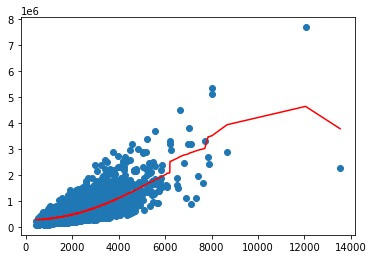

In [60]:
plt.scatter(set_1_X['power_1'], set_1_y)
plt.plot(set_1_X['power_1'], set_1_model.predict(set_1_X), 'r-')
plt.show()

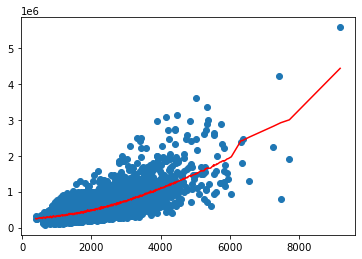

In [61]:
plt.scatter(set_2_X['power_1'], set_2_y)
plt.plot(set_2_X['power_1'], set_2_model.predict(set_2_X), 'r-')
plt.show()

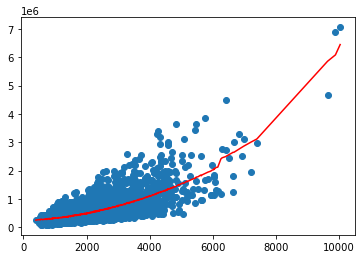

In [62]:
plt.scatter(set_3_X['power_1'], set_3_y)
plt.plot(set_3_X['power_1'], set_3_model.predict(set_3_X), 'r-')
plt.show()

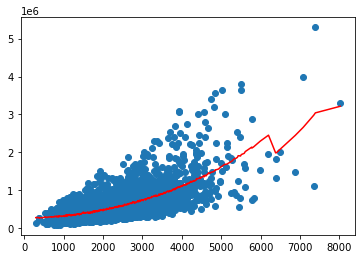

In [63]:
plt.scatter(set_4_X['power_1'], set_4_y)
plt.plot(set_4_X['power_1'], set_4_model.predict(set_4_X), 'r-')
plt.show()

Some questions you will be asked on your quiz:

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**

**Quiz Question: (True/False) the plotted fitted lines look the same in all four plots**

# Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

Again, we set `seed=1` to obtain consistent results for different users.

In [77]:
def best_ploynomial():
    RSS_lst = []
    train_y = sales_train['price']
    valid_y = sales_valid['price']
    for power in range(1, 16):
        train_X = polynomial_dataframe(sales_train['sqft_living'], power)
        valid_X = polynomial_dataframe(sales_valid['sqft_living'], power)
        model = LinearRegression()
        model.fit(train_X, train_y)
        y_hat = model.predict(valid_X)
        RSS = np.sum((valid_y - y_hat)**2)
        RSS_lst.append(RSS)
    return RSS_lst

In [78]:
RSS = best_ploynomial()

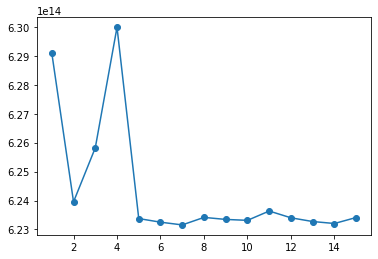

In [80]:
plt.plot(range(1, 16), RSS, 'o-')
plt.show()

**Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

Now that you have chosen the degree of your polynomial using validation data, compute the RSS of this model on TEST data. Report the RSS on your quiz.

In [81]:
train_X = polynomial_dataframe(sales_train['sqft_living'], 6)
test_X = polynomial_dataframe(sales_test['sqft_living'], 6)
train_y = sales_train['price']
test_y = sales_test['price']

In [82]:
best = LinearRegression()
best.fit(train_X, train_y)

LinearRegression()

**Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data?**

In [83]:
y_hat = best.predict(test_X)
RSS = np.sum((test_y - y_hat)**2)
RSS

136766222430292.2